# <span style='color:dodgerblue'> Future Employer Data Science Challenge by John T Foxworthy </span>

###  <span style='color:dodgerblue'> After receiving access to all files, my first reaction is the Logistic Regression model because of paid_first_loan field in the repayment file that enumerates the first paid loan as one and not paying the first loan as zero.  The binary expression of the loan payment is the dependent response variable as I feature engineer the rest of the data in the files for independent explanatory variables. </span>


### <span style='color:dodgerblue'> However, the data is strongly biased because the paid_first_loan field is overwhelmingly skewed towards one value and a small percentage of  paid_first_loan field equaling zero, contributing more than anything else to the status of my work below. </span>

### <span style='color:dodgerblue'> Beyond the work below, the next steps toward implementation of my model is to gather more data, find the source of provided data below and engage with stakeholders to acquire business impacts such as sign up and disbursement dates.  </span>


### 1.  Importing, loading data, formatting, etc.  

In [1]:
# Required imports

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import math

# Model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

### Loading files, formatting and removing any annoying warnings

### The two provided files dataScienceChallenge_repayment.xlsx and dataScienceChallenge_callLog.csv were placed together in merged.csv

### Please note the dummy variables were created from the direction field as the direction values of incoming, outgoing, missed, unknown correspond to the var_inc, var_out, var_mis, and var_unk.  

### Also, the var_sd is the difference between the signup date and the disbursement date fields in the repayment file.    

In [2]:
# remove the scientific notation globally 
pd.options.display.float_format = '{:.4f}'.format

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load the file for analysis and view columns

df1 = pd.read_csv('/Users/lacivert/tala/merged.csv')

list(df1.columns.values)

['person_id_random',
 'phone_randomized',
 'direction',
 'duration',
 'paid_first_loan',
 'var_inc',
 'var_out',
 'var_mis',
 'var_unk',
 'var_sd']

In [3]:
#decribe main descriptive statistics for each variable
df1.describe()

,person_id_random,duration,paid_first_loan,var_inc,var_out,var_mis,var_unk,var_sd
count,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000
mean,5527508299.4875,45.1808,0.9377,0.2849,0.5758,0.1314,0.0079,151.4037
std,2564427029.7385,122.7040,0.2417,0.4514,0.4942,0.3379,0.0886,246.7958
min,1008312365.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,3315068198.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000
50%,5456092676.0000,13.0000,1.0000,0.0000,1.0000,0.0000,0.0000,4.0000
75%,7545986006.0000,44.0000,1.0000,1.0000,1.0000,0.0000,0.0000,230.0000
max,9998624500.0000,9742.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1112.0000


### The descriptive statistics brings up questions to ask the stakeholders, such as the outgoing values in the direction field have higher arithmetic mean than incoming, missing, and unknown.  Some questions of mine are outlined below . . .

###  <span style='color:blue'> 1A:  Does the very high number of first paid loans in the data have a relationship with outgoing calls? </span>

### <span style='color:green'>1B:  Maybe a stakeholder with an interest and concern here can provide some domain knowledge and the businesses' nature with their loans.  What is the classification of businesses associated with provided data?  For example, what do they sell?  Food, household goods, etc.? </span>

### <span style='color:gray'> 1C: Would a business stakeholder provide a business characterization with the direction data such as a successful business that pays its loan properly have more outgoing calls, . . . or does it expect more incoming calls? </span>

### More work can be done here in terms of Exploratory Data Analysis such a correlation matrix function to identify associations of the independent explanatory variables, but I really do not have time.

### Below I am defining the input columns in one dataset, X, . . . and the output, y.  Thereafter, I test, train split to set up the Logistic Regression Model

In [4]:
X = df1[['duration'
         ,'var_inc'
         ,'var_out'
         ,'var_mis'
         ,'var_unk'
         ,'var_sd']]

y = df1['paid_first_loan']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.20
                                                 ,random_state=0
                                                 ,shuffle=False)

In [6]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train,y_train) 
#train data to train the model for further evaluation

y_pred = logistic_regression.predict(X_test) 
#define the predicted values of the mode in order to further compare

### 2.  Stratified K Fold, Confusion Matrix and Receiver Operating Characteristic

### Given the relative unfamiliarity of the data, I chose the stratification approach to sampling by dividing the provided dataset into similar subgroups with some but not a complete success.  I tested and researched this approach given the dataset, but my weakness is the receiver operating characteristic or ROC scores of 0.50 because it is a diagnostic tool of a binary classification system.  A perfect classifier has the ROC value of 1 and my half score represents a bad classifier, but just barely because it is not zero.  More work is required to improve the model.    

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

seed =5
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
#model
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    

1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5
ROC AUC score: 0.5
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5


### A confusion matrix or error matrix is used for the performance of a classifier with four quadrants

### false negatives, false positives, true negatives and true positives.  A suboptimal dual quandrant is 

### returned or a 2 x 2 matrix that checks false positives and true negatives, but it is line of the 93% accuracy

### further below as totals=0's+1's.  

### The ones represent a perfect match (real=predicted outcome; 0s represent incorrect matches)

Predicted       1
Actual           
0           15262
1          194453


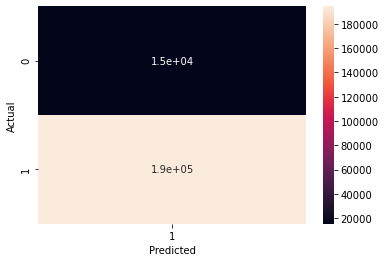

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred
                               , rownames=['Actual']
                               , colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

print(confusion_matrix)

In [9]:
#following comparison between real and predicted y data
print('Accuracy of logistic regression model is: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
plt.show()

Accuracy of logistic regression model is: 0.93


### My attempt, a scratch pad approach, to fit the logistic regression and predict some values . . . nothing of great importance.

In [10]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [11]:
clf.predict_proba(X) 
#this returns the matrix of probabilities that the predicted output is equal to zero or one
#this is why below we have every time dual components (one for the prob. of 0 and one for the prob. of 1)
#e.g. for the first values the probability that it is 1 is a lot higher

array([[0.06137943, 0.93862057],
       [0.06076522, 0.93923478],
       [0.06242594, 0.93757406],
       ...,
       [0.04739421, 0.95260579],
       [0.04887219, 0.95112781],
       [0.04776513, 0.95223487]])

### Plot below of the true positive rate against the false positive rate as a Receiver Operating
### Operating Characteristic (ROC) curve shows the tradeoff between sensitivity and specificity.
### An approximate 60% value is not bad and it is good.

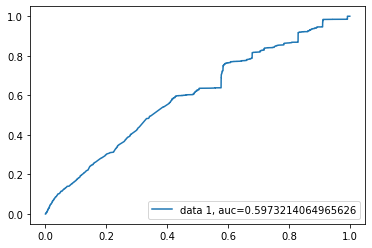

In [12]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


In [13]:
logistic_regression= LogisticRegression()

In [14]:
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [15]:
#testing the data with fresh new input (not from the same file)
df2 = pd.read_csv('/Users/lacivert/tala/merged.csv')
df2.describe() #so we have a small new candidates new set of data to test this model

,person_id_random,duration,paid_first_loan,var_inc,var_out,var_mis,var_unk,var_sd
count,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000
mean,5527508299.4875,45.1808,0.9377,0.2849,0.5758,0.1314,0.0079,151.4037
std,2564427029.7385,122.7040,0.2417,0.4514,0.4942,0.3379,0.0886,246.7958
min,1008312365.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,3315068198.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000
50%,5456092676.0000,13.0000,1.0000,0.0000,1.0000,0.0000,0.0000,4.0000
75%,7545986006.0000,44.0000,1.0000,1.0000,1.0000,0.0000,0.0000,230.0000
max,9998624500.0000,9742.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1112.0000


### I create a 2x2 matrix with checks for . . . true positives, true negatives, false positives and true negatives.

### The ones represent perfect match (real=predicted outcome; zeros represent incorrect matches)

### Please note this is in line with the accuracy printed below of 92% as totals=92/(8+92)

Predicted       1
Actual           
0           65347
1          983228
Accuracy of logistic regression model is: 0.94


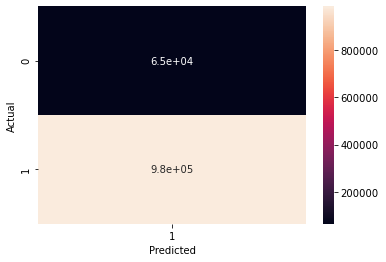

Accuracy: 0.9376801850129938
Precision: 0.9376801850129938


In [16]:
X_new_candidates = df2[['duration' #we define the input values (splitting between predictors and outcome)
         ,'var_inc'
         ,'var_out'
         ,'var_mis'
         ,'var_unk'
         ,'var_sd']]
y_test_new_candidates = df2['paid_first_loan'] #we define the Y values from the same file
y_pred_new_candidates = logistic_regression.predict(X_new_candidates)
# compute/estimate the y values from the model

# assess the model
confusion_matrix = pd.crosstab(y_test_new_candidates, y_pred_new_candidates
                               , rownames=['Actual']
                               , colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
print('Accuracy of logistic regression model is: {:.2f}'.format(metrics.accuracy_score(y_test_new_candidates, y_pred_new_candidates)))
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test_new_candidates, y_pred_new_candidates))
print("Precision:",metrics.precision_score(y_test_new_candidates, y_pred_new_candidates))

### An accuracy of 94% is an outstanding output, and the high number of datasets does help.  Regression Models, including this Logistic Model above, with the more data we have, the more relevant the output comes up within our analysis.

### <span style='color:red'> More work is required in feature engineering, exploratory data analysis and to raise my domain knowledge by engaging with stakeholders. </span>